# Abalone Age Prediction

In [148]:
import pandas as pd

## Dataset

In [149]:
file_path = './data/abalone.csv'
df = pd.read_csv(file_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [150]:
df['Age'] = df['Rings'] + 1.5

df = df.drop(['Rings'], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Data Analysis

In [151]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [153]:
# Get the shape of the data
df.shape

(4177, 9)

In [154]:
# Get the column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [155]:
# Count missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [156]:
# Select duplicated rows
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


Seems like there is no duplicated data

In [157]:
# Select categorical data, numerical data
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['float64', 'int64'])

categorical_data.head(), numerical_data.head()

(  Sex
 0   M
 1   M
 2   F
 3   M
 4   I,
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight   Age  
 0         0.150  16.5  
 1         0.070   8.5  
 2         0.210  10.5  
 3         0.155  11.5  
 4         0.055   8.5  )

In [158]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Data visualization

(1.0999999999999999, 31.9, 0.0, 1730.4)

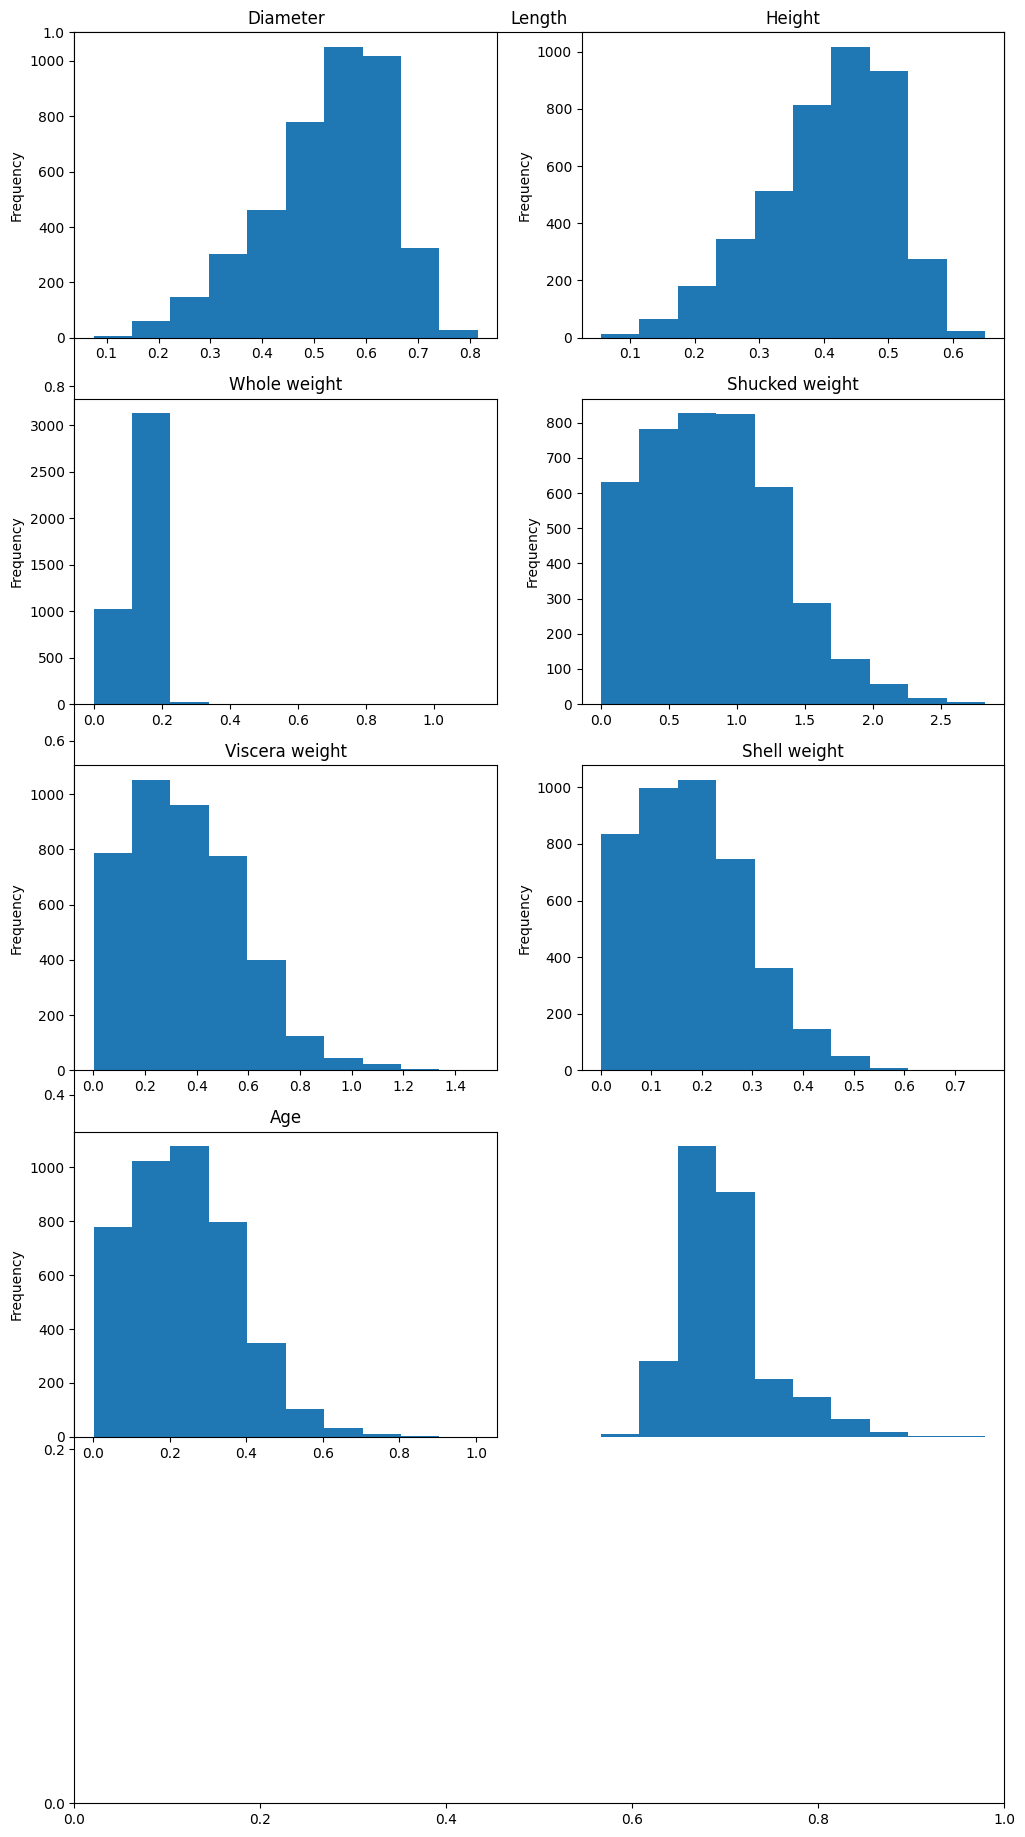

In [159]:
import matplotlib.pyplot as plt
# Plot age
plt.figure(figsize=(12, 23))
for i, col in enumerate(numerical_data):
  plt.title(col, fontsize=12)
  ax = plt.subplot(5, 2, i+1)
  if col == 'Sex':
    df[col].value_counts().plot.bar()
  else:
    df[col].plot.hist()
plt.axis(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbfc3c89d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbfc3c9c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dbfc31d190>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbfc3cad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbfc3cb5d0>],
 'means': []}

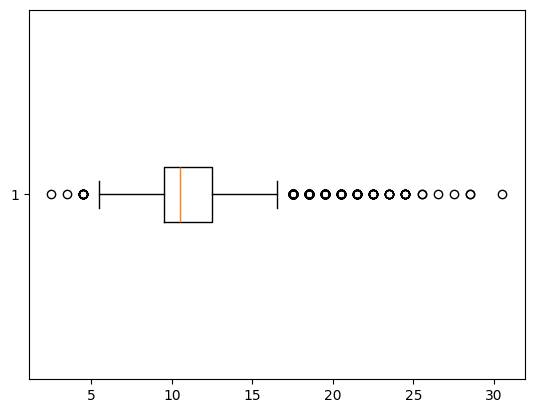

In [160]:
plt.boxplot(df['Age'], vert=False)

## Feature Correlation

In [161]:
pearson_corr = df.corr('pearson', numeric_only=True)
pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

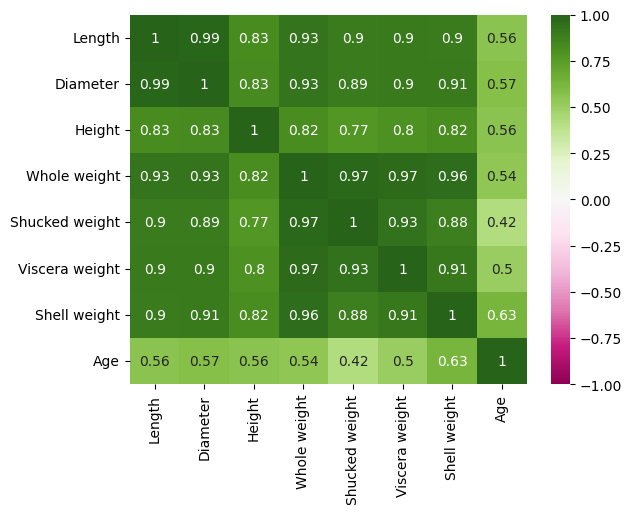

In [162]:
import seaborn as sns

sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmax=1, vmin=-1)

## Cleaning Data

In [163]:
import numpy as np
def remove_outliers(df: pd.DataFrame):
  numerical_df = df.select_dtypes(include=np.number)
  Q1 = numerical_df.quantile(0.25)
  Q3 = numerical_df.quantile(0.75)
  IQR = Q3 - Q1
  
  outlier = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
  return df[~outlier]

df = remove_outliers(df)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1dbfc557350>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbfc5645d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dbfc556bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbfc565690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbfc565e90>],
 'means': []}

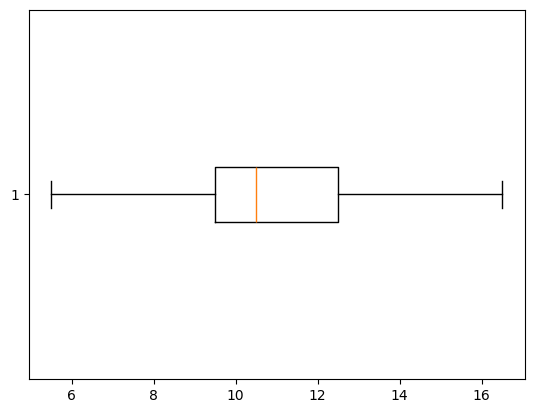

In [164]:
plt.boxplot(df['Age'], vert=False)

## Data Encoding

In [165]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [166]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

df.head()

C:\Users\sunch\AppData\Local\Temp\ipykernel_23436\1718764929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [167]:
df.shape

(3781, 9)

In [168]:
numerical_data.shape

(4177, 8)

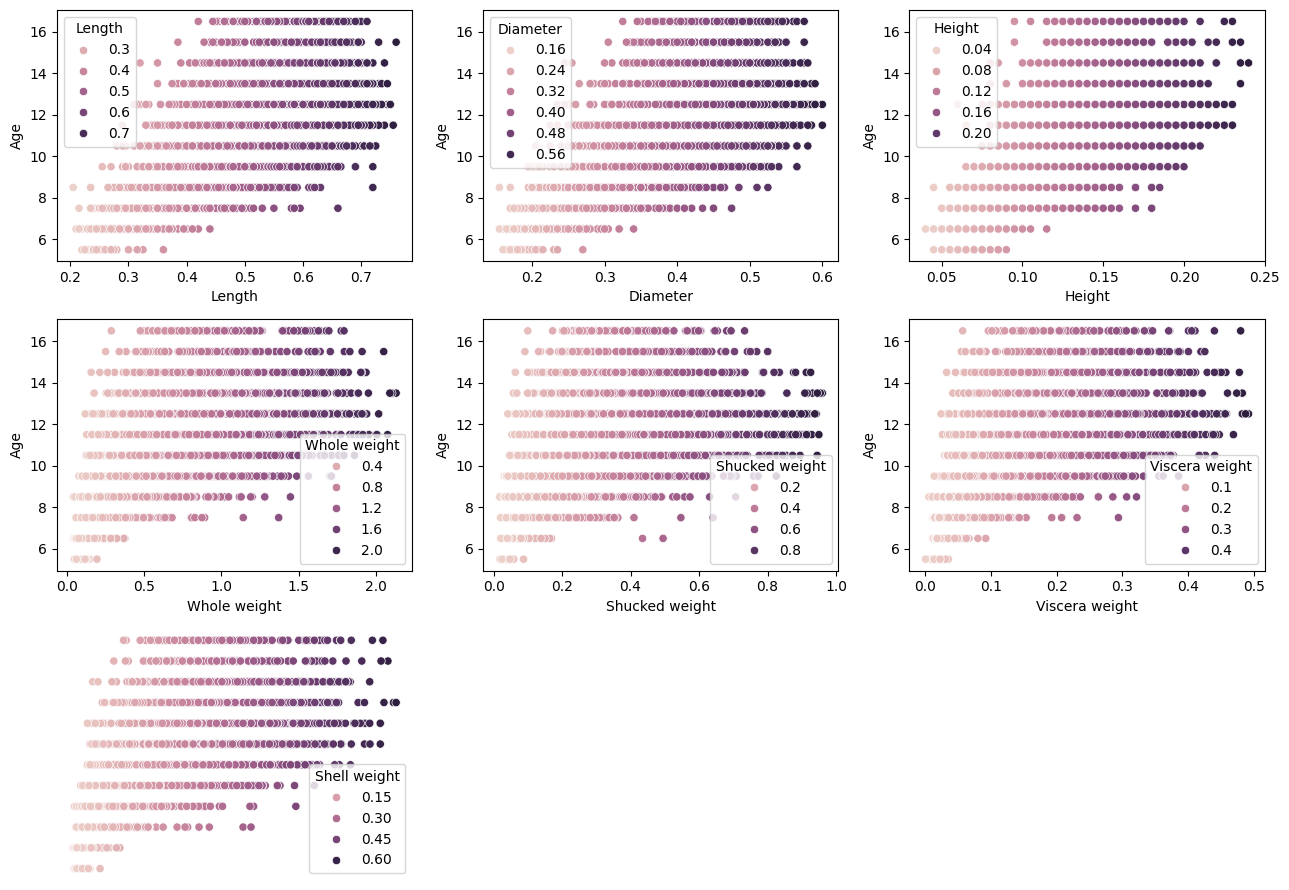

In [169]:
plt.figure(figsize=(13, 9))

target='Age'

for i, col in enumerate(numerical_data):
  if(col != target):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(df, x=col, y=target, hue=col)
    

plt.axis("off")
plt.tight_layout()

## Splitting data

In [170]:
from sklearn.model_selection import train_test_split
# Splitting data
train_data, test_data = train_test_split(df, random_state=42, test_size=0.25)

# Change datatype to float32
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
len(train_data), len(test_data)

(2835, 946)

In [171]:
train_data[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1071,2.0,0.385,0.290,0.080,0.2485,0.1220,0.0495,0.0650,8.5
784,2.0,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.0150,6.5
2064,0.0,0.535,0.420,0.125,0.7380,0.3550,0.1895,0.1795,9.5
3428,2.0,0.250,0.180,0.065,0.0805,0.0345,0.0185,0.0215,5.5
3351,1.0,0.510,0.380,0.130,0.5840,0.2240,0.1355,0.1850,14.5


## Separating input and target data

In [172]:
from helper_functions import separate_input_and_target

train_input, train_label = separate_input_and_target(data=train_data, target='Age')
test_input, test_label  = separate_input_and_target(data=test_data, target='Age')

train_input.shape, train_label.shape, test_input.shape, test_label.shape

((2835, 8), (2835,), (946, 8), (946,))

In [173]:
train_input[:5], train_label[:5]

(      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 1071  2.0   0.385     0.290   0.080        0.2485          0.1220   
 784   2.0   0.215     0.155   0.060        0.0525          0.0210   
 2064  0.0   0.535     0.420   0.125        0.7380          0.3550   
 3428  2.0   0.250     0.180   0.065        0.0805          0.0345   
 3351  1.0   0.510     0.380   0.130        0.5840          0.2240   
 
       Viscera weight  Shell weight  
 1071          0.0495        0.0650  
 784           0.0165        0.0150  
 2064          0.1895        0.1795  
 3428          0.0185        0.0215  
 3351          0.1355        0.1850  ,
 1071     8.5
 784      6.5
 2064     9.5
 3428     5.5
 3351    14.5
 Name: Age, dtype: float32)

## Models

### Neural Network Model

#### Turn data into tensors

In [174]:
from helper_functions import convert_numpy_to_tensor
X_train, X_test = convert_numpy_to_tensor(data=train_input), convert_numpy_to_tensor(data=test_input)
y_train, y_test = convert_numpy_to_tensor(data=train_label), convert_numpy_to_tensor(data=test_label)

y_train, y_test = y_train.unsqueeze(dim=1), y_test.unsqueeze(dim=1)

X_train.dtype, y_train.dtype

(torch.float32, torch.float32)

#### Check the shape of tensor

In [175]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([2835, 8]),
 torch.Size([2835, 1]),
 torch.Size([946, 8]),
 torch.Size([946, 1]))

In [176]:
X_train[:5], y_train[:5]

(tensor([[2.0000, 0.3850, 0.2900, 0.0800, 0.2485, 0.1220, 0.0495, 0.0650],
         [2.0000, 0.2150, 0.1550, 0.0600, 0.0525, 0.0210, 0.0165, 0.0150],
         [0.0000, 0.5350, 0.4200, 0.1250, 0.7380, 0.3550, 0.1895, 0.1795],
         [2.0000, 0.2500, 0.1800, 0.0650, 0.0805, 0.0345, 0.0185, 0.0215],
         [1.0000, 0.5100, 0.3800, 0.1300, 0.5840, 0.2240, 0.1355, 0.1850]]),
 tensor([[ 8.5000],
         [ 6.5000],
         [ 9.5000],
         [ 5.5000],
         [14.5000]]))

#### Define the Model

In [177]:
from nn_model import NeuralNetworkModel

model_0 = NeuralNetworkModel(input_features=8, output_features=1)
model_0

NeuralNetworkModel(
  (layer_1): Sequential(
    (0): Linear(in_features=8, out_features=1, bias=True)
  )
)

#### Making predictions

In [178]:
y_pred = model_0(X_train)

y_pred[:5], y_train[:5]

(tensor([[-0.8487],
         [-0.8913],
         [-0.1692],
         [-0.8848],
         [-0.5166]], grad_fn=<SliceBackward0>),
 tensor([[ 8.5000],
         [ 6.5000],
         [ 9.5000],
         [ 5.5000],
         [14.5000]]))

#### Plot predictions

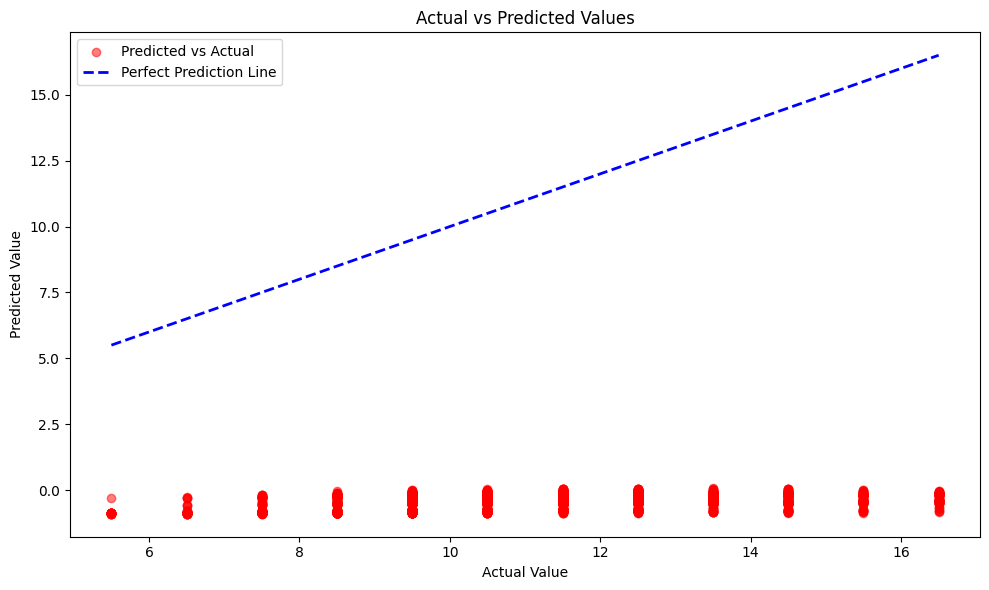

In [179]:
from helper_functions import plot_pred
plot_pred(actual_value=y_train.detach().numpy(), pred=y_pred.squeeze().detach().numpy())

#### Setup loss function and Optimizer (Gradient Descent)

In [180]:
import torch
from torch import nn

# Setup L1Loss or MAELoss as loss fn
loss_fn = nn.L1Loss()

# Setup Adam Optim as Gradient descent
optimizer = torch.optim.Adam(lr=0.01, params=model_0.parameters())

#### Training and Testing loop

In [181]:
from nn_model import train_fn
epochs = 10000

nn_train_loss, nn_test_loss = train_fn(model=model_0, 
      loss_fn=loss_fn,
      num_epochs=epochs,
      optimizer=optimizer,
      test_data=X_test,
      test_label=y_test,
      train_data=X_train,
      train_label=y_train)

print(f"-----\n")
print(f"Final Train loss: {nn_train_loss} | Test loss: {nn_test_loss}")

  0%|          | 0/10000 [00:00<?, ?it/s]

-----

Final Train loss: 1.2496501207351685 | Test loss: 1.2470581531524658


#### Evaluating the model performance

In [182]:
model_0.eval()
with torch.inference_mode():
  y_pred_new = model_0(X_test)

y_pred_new[:5], y_test[:5]

(tensor([[9.9942],
         [9.4420],
         [9.9552],
         [8.3745],
         [9.3006]]),
 tensor([[8.5000],
         [8.5000],
         [9.5000],
         [8.5000],
         [9.5000]]))

#### Plot the predictions

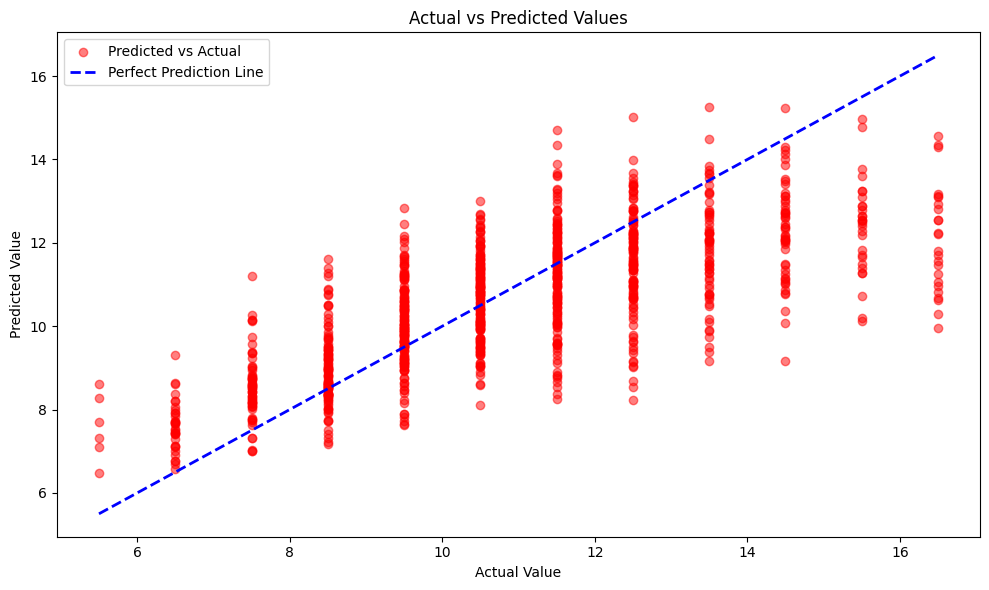

In [183]:
from helper_functions import plot_pred
plot_pred(actual_value=y_test.detach().numpy(), pred=y_pred_new.squeeze().detach().numpy())

### Random Forest

#### Separating data

In [184]:
from helper_functions import separate_input_and_target

X_train, y_train = separate_input_and_target(train_data, target='Age')
X_test, y_test = separate_input_and_target(test_data, target='Age')

#### Changing data to numpy

In [185]:
# Convert to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Convert to numpy
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train[:5], y_train[:5]

(array([[2.    , 0.385 , 0.29  , 0.08  , 0.2485, 0.122 , 0.0495, 0.065 ],
        [2.    , 0.215 , 0.155 , 0.06  , 0.0525, 0.021 , 0.0165, 0.015 ],
        [0.    , 0.535 , 0.42  , 0.125 , 0.738 , 0.355 , 0.1895, 0.1795],
        [2.    , 0.25  , 0.18  , 0.065 , 0.0805, 0.0345, 0.0185, 0.0215],
        [1.    , 0.51  , 0.38  , 0.13  , 0.584 , 0.224 , 0.1355, 0.185 ]],
       dtype=float32),
 array([ 8.5,  6.5,  9.5,  5.5, 14.5], dtype=float32))

#### Defining the model

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model_1 = RandomForestRegressor(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
model_1

RandomForestRegressor(n_estimators=10, random_state=0)

#### Fitting data

In [187]:
model_1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### Making predictions

In [188]:
y_test_pred = model_1.predict(X_test)

y_test_pred[:10], y_test[:10]

(array([ 9.9,  8.9, 11. ,  9.3,  9.1, 13.9, 12.8,  8. ,  7.4, 10.4]),
 array([ 8.5,  8.5,  9.5,  8.5,  9.5, 16.5, 13.5,  8.5,  7.5, 10.5],
       dtype=float32))

#### Evaluating the model

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_mse_error = mean_squared_error(y_test, y_test_pred)
rf_mae_error = mean_absolute_error(y_test, y_test_pred)

print(f"Mean squared error: {rf_mse_error}")
print(f"Mean absolute error: {rf_mae_error}")

Mean squared error: 2.797315010570825
Mean absolute error: 1.2913319238900633


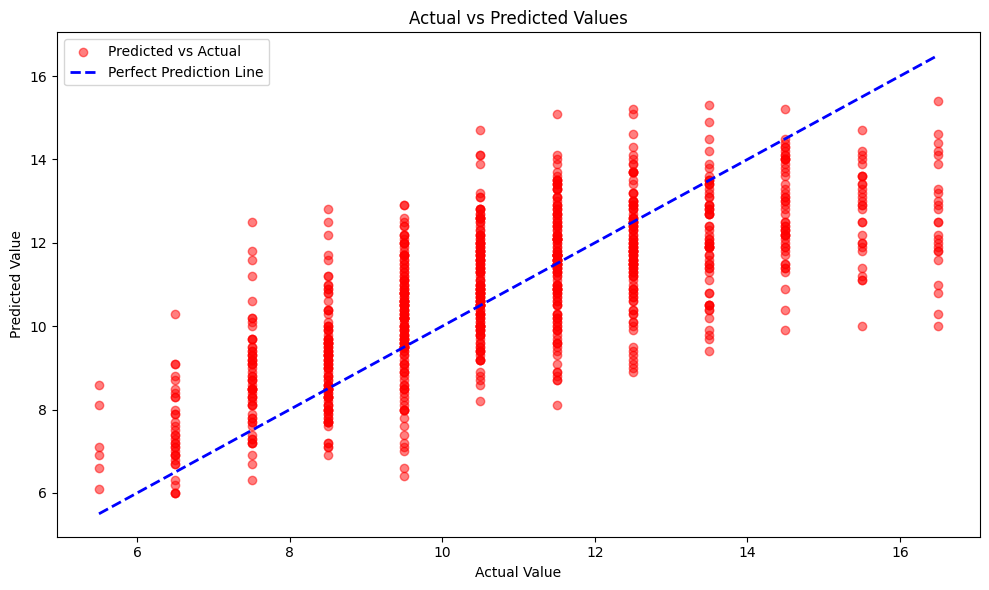

In [190]:
from helper_functions import plot_pred
plot_pred(y_test, y_test_pred)